In [1]:
import os
os.chdir('..')

In [2]:
import torch
from PIL import Image
import cv2 
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# define location of model
MODEL_PATH = 'weights/yolo/best.pt'
classes = ['market_name','date','bill_code','product_attributes']

def yolov5_predict(image_path):
  model = torch.hub.load('ultralytics/yolov5', 'custom', path_or_model=MODEL_PATH)
  img = Image.open(image_path)
  results = model(img)
  prediction = []
  for item in results.xyxy[0]:
    [xmin, ymin, xmax, ymax, conf, class_num] = item
    xmin, ymin, xmax, ymax, conf = int(xmin.item()), int(ymin.item()), int(xmax.item()), int(ymax.item()), np.round(conf.item(),4)
    class_name = classes[int(class_num)]
    prediction.append({
        "label": class_name,
        "xmin": xmin,
        "xmax": xmax,
        "ymin": ymin,
        "ymax": ymax
    })
  return prediction


In [5]:
def imShow(image):
  %matplotlib inline
  
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

def draw_bndbox(image_path):
  img = cv2.imread(image_path)
  font = cv2.FONT_HERSHEY_SIMPLEX
  fontScale = 0.8
  color = (255, 0, 0)
  thickness = 2

  for item in yolov5_predict(image_path):
    xmin, ymin, xmax, ymax, label = item["xmin"], item["ymin"], item["xmax"], item["ymax"], item["label"]
    org = (int(xmin/2+xmax/2), ymin)

    if label == "market_name":
      img = cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0),2)
    elif label == "date":
      img = cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (0,255,0),2)
    elif label == "bill_code":
      img = cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (0,0,255),2)
    elif label == "product_attributes":
      img = cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,255),2)
    img = cv2.putText(img, label, org, font, fontScale, color, thickness, cv2.LINE_AA)
  return img


Using cache found in /home/vantuan5644/.cache/torch/hub/ultralytics_yolov5_master

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Focus                     [3, 32, 3]                    
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1    156928  models.common.C3                        [128, 128, 3]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  1    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv       

Adding autoShape... 


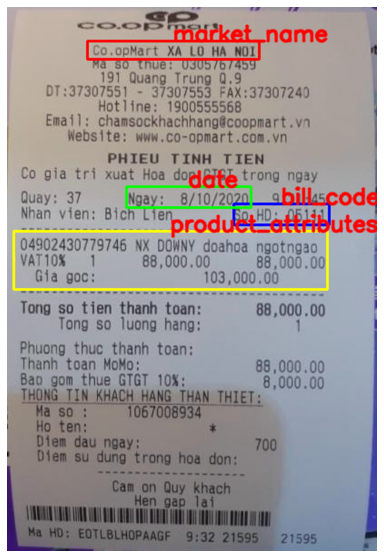

In [6]:
image_path = "datasets/COOP/transformed/img_1_padded.jpg"

imShow(cv2.cvtColor(draw_bndbox(image_path), cv2.COLOR_BGR2RGB))


In [7]:
print(yolov5_predict(image_path))

Using cache found in /home/vantuan5644/.cache/torch/hub/ultralytics_yolov5_master

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Focus                     [3, 32, 3]                    
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1    156928  models.common.C3                        [128, 128, 3]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  1    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv       

Adding autoShape... 
[{'label': 'bill_code', 'xmin': 249, 'xmax': 354, 'ymin': 216, 'ymax': 239}, {'label': 'product_attributes', 'xmin': 7, 'xmax': 352, 'ymin': 246, 'ymax': 310}, {'label': 'date', 'xmin': 131, 'xmax': 268, 'ymin': 197, 'ymax': 220}, {'label': 'market_name', 'xmin': 88, 'xmax': 277, 'ymin': 37, 'ymax': 57}]
